In [58]:
import pandas as pd
import geopandas

# prevent false warning
# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

import rasterio
import rasterio.mask

from dbconf import get_engine

In [39]:
regions_gdf = geopandas.read_file('../input/shapes/Districts_Shapefiles_2019/Regions Based on Districts.shp')

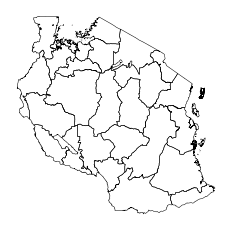

In [40]:
ax = regions_gdf.plot(facecolor="none", edgecolor='black', lw=0.5)
ax.axis('off')
plt.savefig('Regions.pdf', bbox_inches='tight')
plt.show()

In [42]:
regions_gdf

,Region_Nam,Region_Cod,geometry
0,Dodoma,1,"MULTIPOLYGON (((36.31609 -5.52782, 36.31818 -5..."
1,Simiyu,24,"POLYGON ((34.88258 -2.99594, 34.88270 -3.00102..."
2,Singida,13,"POLYGON ((34.24180 -5.40433, 34.24180 -5.40265..."
3,Kilimanjaro,3,"POLYGON ((38.39026 -4.10047, 38.40446 -4.11112..."
4,Tabora,14,"MULTIPOLYGON (((34.01781 -5.71175, 34.02947 -5..."
5,Morogoro,5,"MULTIPOLYGON (((37.43550 -8.54236, 37.43420 -8..."
6,Njombe,22,"POLYGON ((35.13503 -9.76657, 35.13085 -9.76896..."
7,Rukwa,15,"MULTIPOLYGON (((31.38413 -7.47240, 31.39091 -7..."
8,Mara,20,"MULTIPOLYGON (((33.33392 -2.28569, 33.33453 -2..."
9,Ruvuma,10,"POLYGON ((35.38868 -11.57169, 35.37391 -11.571..."


In [46]:
single_region_gdf = regions_gdf[regions_gdf['Region_Nam'] == 'Morogoro'].reset_index()


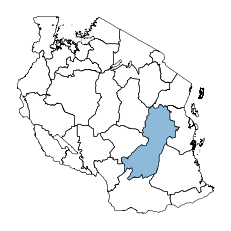

In [50]:
ax = regions_gdf.plot(facecolor="none", edgecolor='black', lw=0.5)

single_region_gdf.plot(ax=ax, alpha=0.5)
ax.axis('off')
plt.savefig('Regions_with_aoi.pdf', bbox_inches='tight')
plt.show()

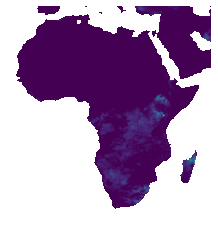

In [25]:
src = rasterio.open("../input/data/chc_chirps/chirps-v2.0.2010.01.01.tif", nodata=255)
band1 = src.read(1)
band1[band1 == -9999] = np.nan
plt.imshow(band1)
plt.axis('off')
plt.savefig('Chirps.pdf', bbox_inches='tight')


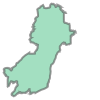

In [60]:
mask = [single_region_gdf.at[0, 'geometry']]
out_image, out_transform = rasterio.mask.mask(src, mask, crop=True, nodata=-9999)



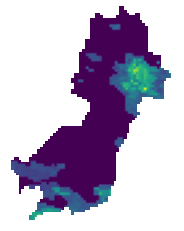

In [63]:
band1 = out_image[0]
band1[band1 == -9999] = np.nan
plt.imshow(band1)
plt.axis('off')
plt.savefig('Chirps_Cut.pdf', bbox_inches='tight')

In [30]:
tzagdf = geopandas.GeoDataFrame.from_postgis('SELECT * FROM thfr', con=get_engine(), geom_col='geometry')

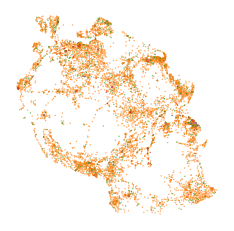

In [38]:
ax = tzagdf.plot(markersize=0.1, column='Facility Type')
ax.axis('off')
plt.savefig('thfr.pdf', bbox_inches='tight')
plt.show()